## Fig. 4b Dependence of OxPhos flux as a function of the maximal reaction velocity of the coarse-grained OxPhos reaction. 

In [1]:

from pandas import read_csv

oxphos_scan = read_csv("../../data/scan/oxphos_param_scan_copasi.csv", sep=r"\s+",
                       names=["glue", "v_oxphos", "oxphos_flux"], header=0)
oxphos_scan.head()


,glue,v_oxphos,oxphos_flux
0,0.5,0.000,0.000000
1,0.5,0.035,0.026782
2,0.5,0.070,0.053473
3,0.5,0.105,0.080077
4,0.5,0.140,0.106596


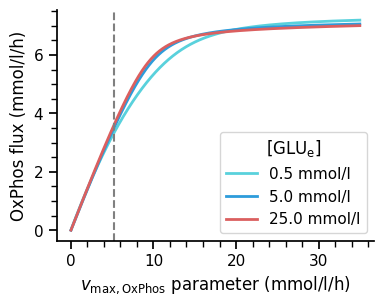

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

colors = {0.5: '#59D1DC', 5: '#2D9CDB', 12: '#8A5FDB', 25: '#DB5F5F'}
plt.figure(figsize=(4.1, 3))

sns.set_context('notebook')
ax = sns.lineplot(
    data=oxphos_scan,
    x="v_oxphos",
    y="oxphos_flux",
    hue="glue",
    linewidth=2,
    palette=colors
)

leg = ax.legend(title="$\\mathregular{[GLU_e]}$")

for txt in leg.get_texts():
    txt.set_text(f"{txt.get_text()} mmol/l")

vmax_oxphos_ref = 5.25  # mmol/l/h
plt.axvline(vmax_oxphos_ref, ls="--", c="gray")

plt.xlabel("$v_{\\mathrm{max,OxPhos}}$ parameter (mmol/l/h)")
plt.ylabel("OxPhos flux (mmol/l/h)")
plt.minorticks_on()

path = "../../out/oxphos_vs_vmax_vs_glue.png"
plt.savefig(path, bbox_inches="tight", transparent=True, dpi=300)
plt.show()


## Fig. 4a Dependency of the specific growth rate on the maximal reaction velocity of the coarse-grained overall growth reaction.


In [3]:

growth_scan = read_csv("../../data/scan/growth_param_scan_copasi.csv", sep=r"\s+", names=["glue", "v_growth", "growth"],
                       header=0)
growth_scan.head()


,glue,v_growth,growth
0,0.5,0,0.000000e+00
1,0.5,4,7.635000e-07
2,0.5,8,1.526420e-06
3,0.5,12,2.288770e-06
4,0.5,16,3.050550e-06


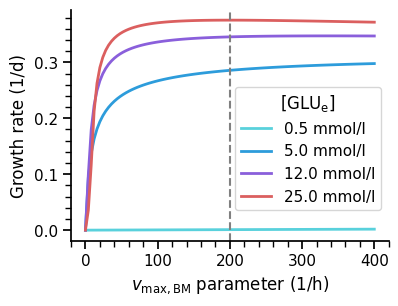

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
plt.figure(figsize=(4.1, 3))

tmp = growth_scan.assign(growth_per_day=growth_scan['growth'] * 24)

ax = sns.lineplot(
    data=tmp,
    x="v_growth",
    y="growth_per_day",  # now plotting the 1/d values
    hue="glue",
    linewidth=2,
    palette=colors
)

leg = ax.legend(title="$\\mathregular{[GLU_e]}$",
                bbox_to_anchor=(1.0, 0.7))
for txt in leg.get_texts():
    txt.set_text(f"{txt.get_text()} mmol/l")

vmax_bm_ref = 200  # 1/h
plt.axvline(vmax_bm_ref, ls="--", c="gray")

plt.ylabel('Growth rate (1/d)')
plt.xlabel("$v_{\\mathrm{max,BM}}$ parameter (1/h)")
plt.minorticks_on()

path = "../../out/growth_vs_vmax_vs_glue.png"
plt.savefig(path, bbox_inches='tight', transparent=True, dpi=300)
plt.show()
